# AIM OF THE PROJECT

1. The main aim of the project is to predict whether the airline-passengers is stationary or not.

2. Build ARIMA Model on the top of the dataset and perform future forecasting on the data and even predict the data for the next 10 years.

In [1]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset

data = pd.read_csv('airline-passengers.csv')
print(data)

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


In [3]:
# To make the Month column as index
data = pd.read_csv('airline-passengers.csv', index_col = 'Month', parse_dates = True)
print(data)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


In [4]:
# Make the Starting date of the Month as index frequency
data.index.freq = 'MS'
print(data)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


In [5]:
# Get all the indexes from the dataset
print(data.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')


In [6]:
# Get the first five rows of the dataset
print(data.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [7]:
# Get the last five rows of the dataset
print(data.tail())

            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


In [8]:
# Shape of the dataset

print(data.shape)

(144, 1)


In [9]:
# To check if there are any NULL Values in the dataset

print(data.isnull().sum())

Passengers    0
dtype: int64


In [10]:
# So from the above observation, it is clear that there are no NULL Values in the dataset

<Axes: xlabel='Month'>

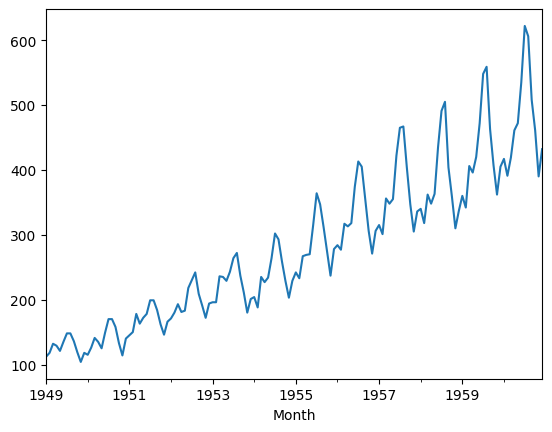

In [11]:
# Make a simple plot on the Airline-Passengers dataset

data['Passengers'].plot()

# We can see that there is a seasonality trend in the dataset moving in the upward direction.

In [12]:
# ETS DECOMPOSITION - To decompose the entire data into single and individual components of the time series of the dataset

from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(data['Passengers'], model = 'multiplicative')

In [13]:
results

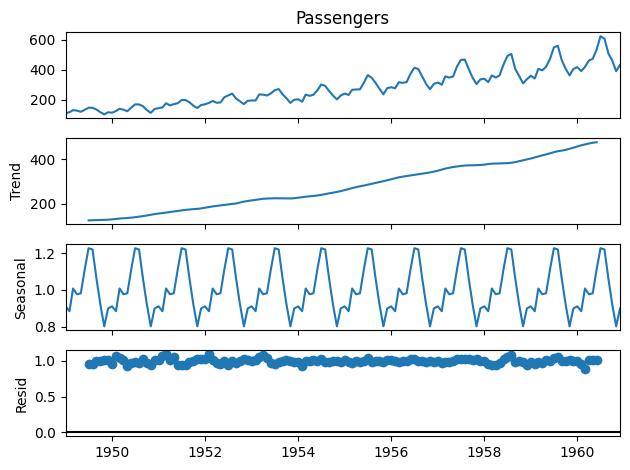

In [14]:
# plot the individual component of the time series of the airline - passengers dataset

results.plot();

# From the above observation, we can see that the trend is moving in the upward direction.

# There is also seasonality in the data

In [15]:
!pip install pmdarima

In [16]:
# CHECK WHETHER THE ORDER OF DIFFERENCING IN THE DATA

from pmdarima import auto_arima

step_results_data = auto_arima(data['Passengers'],
                               start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True,
                               d = None, D = 1, trace = True,
                               error_action = 'ignore',
                               suppress_warnings = True,
                                stepwise = True
                               )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.41 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.34 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.62 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.83 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.40 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [17]:
# Get the summary model for the data
step_results_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 03 Jul 2023   AIC                           1019.178
Time:                                     13:14:54   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# From the above observation, we got p = 0, d = 1, q = 1. So as d = 1, single level differencing is needed to convert the non stationary data into stationary data

In [18]:
# FIRST LEVEL DIFFERENCING

from statsmodels.tsa.statespace.tools import diff

data['first_shift'] = diff(data['Passengers'], k_diff = 1)

In [19]:
print(data)

            Passengers  first_shift
Month                              
1949-01-01         112          NaN
1949-02-01         118          6.0
1949-03-01         132         14.0
1949-04-01         129         -3.0
1949-05-01         121         -8.0
...                ...          ...
1960-08-01         606        -16.0
1960-09-01         508        -98.0
1960-10-01         461        -47.0
1960-11-01         390        -71.0
1960-12-01         432         42.0

[144 rows x 2 columns]


In [20]:
# AUGMENTED DICKEY FULLER TEST

## This test is used to check for the orders of the ARIMA Model

In [21]:
from statsmodels.tsa.stattools import adfuller

adf_results = adfuller(data['first_shift'].dropna(), autolag = 'AIC')

In [22]:
print(adf_results)

(-2.8292668241699963, 0.05421329028382592, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)


In [23]:
# To give the title to the ADF Function on the data
print('Performing Augmented Dickey Fuller Test on the Time Series Data')

adf_results_data = pd.Series(adf_results[0:4], index = ['ADF Test Statistics', 'P- Test', 'Lags used', 'No of observations'])

print(adf_results_data)

for key, value in adf_results[4].items():
    adf_results_data[f'Critical Values({key})'] = value
print(adf_results_data)

Performing Augmented Dickey Fuller Test on the Time Series Data
ADF Test Statistics     -2.829267
P- Test                  0.054213
Lags used               12.000000
No of observations     130.000000
dtype: float64
ADF Test Statistics      -2.829267
P- Test                   0.054213
Lags used                12.000000
No of observations      130.000000
Critical Values(1%)      -3.481682
Critical Values(5%)      -2.884042
Critical Values(10%)     -2.578770
dtype: float64


# From the above observation , we can see that the P- Test Value is 0.05 which is equal to the significant value, so now this data is sationary

In [24]:
#  PLOT ACF AND PACF VALUES

from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [25]:
# To compute the acf of the Airline Passengers

acf_data = acf(data['Passengers'])

print(acf_data)

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376]


In [26]:
# To compute the pacf of the Airline Passengers

pacf_values = pacf(data['Passengers'])
print(pacf_values)

[ 1.          0.95467704 -0.26527732  0.05546955  0.10885622  0.08112579
  0.00412541  0.15616955  0.10370833  0.28878144  0.20691805  0.2411297
 -0.15800498 -0.7183246  -0.08948064  0.22160591  0.13462253  0.11561572
  0.1948294   0.09665618 -0.20215868 -0.0936381 ]


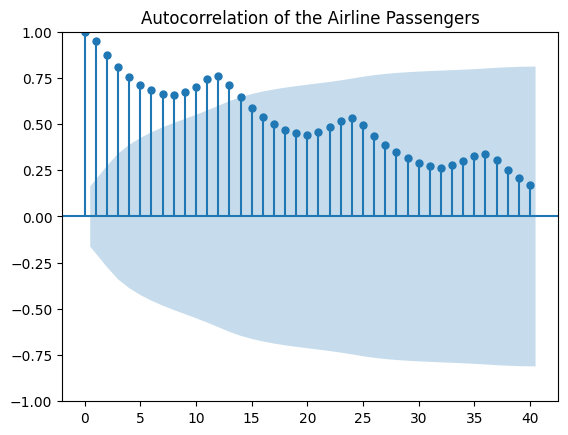

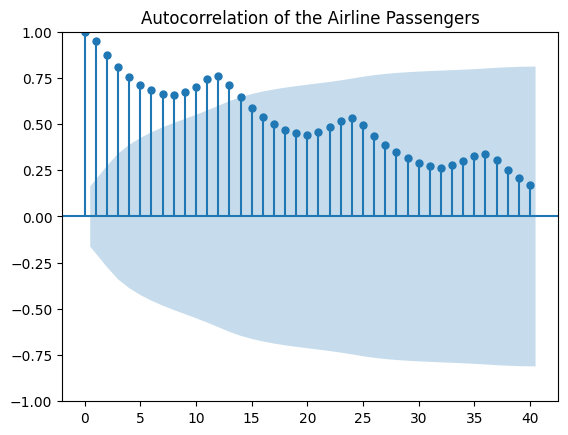

In [27]:
# To plot the acf of the Airline Passengers

plot_acf(data['Passengers'], title = 'Autocorrelation of the Airline Passengers', lags = 40)

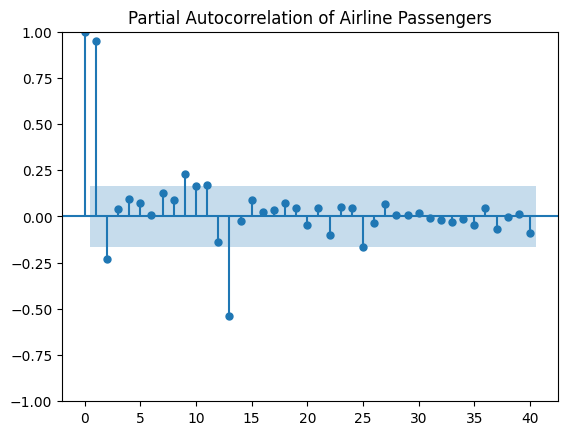

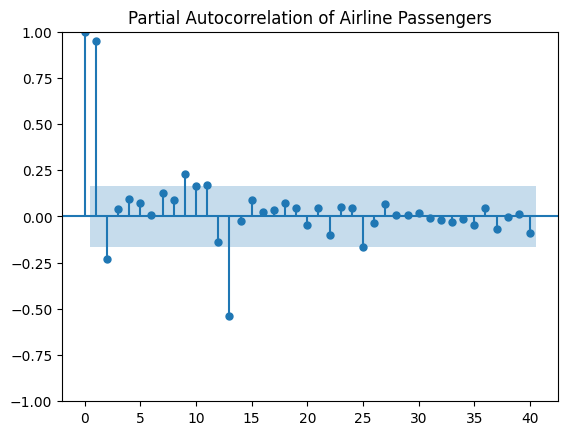

In [28]:
# To plot the pacf of the Airline Passengers

plot_pacf(data['Passengers'], title = 'Partial Autocorrelation of Airline Passengers', lags = 40)

In [29]:
# From the above observation , we can see that there is a gradual decrease in acf value and even there is sudden decrease in pacf value, so then the autocorrelation can better be explained by including only AR term and excluding MA term.

In [30]:
# BUILD ARIMA MODEL AND PREDICT THE VALUES FOR NEXT TEN YEARS

In [31]:
# Shape of the dataset

print(data.shape)

(144, 2)


In [32]:
# Divide the dataset into training and test data for one year
train = data.iloc[:132]
test  = data.iloc[132:]

In [33]:
# BUILD THE ARIMA MODEL ON THE TRAINING DATA

import statsmodels.api as sm
# call the object for ARIMA Model
model = sm.tsa.arima.ARIMA(data['Passengers'], order = (0,1,1))

# train the ARIMA Model
results = model.fit()

# Provide the summary of the ARIMA Model on training data
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -696.629
Date:                Mon, 03 Jul 2023   AIC                           1397.258
Time:                        13:14:55   BIC                           1403.183
Sample:                    01-01-1949   HQIC                          1399.665
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4027      0.077      5.252      0.000       0.252       0.553
sigma2       996.0870    108.453      9.184      0.000     783.522    1208.652
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.79   Prob(JB):                         0.40
Heteroskedasticity (H):               8.04   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# Predict the Values for the test data on ARIMA Model
start = len(train)


end = len(train) + len(test) - 1

result_predictions = results.predict(start = start, end = end, typ = 'levels', dynamic = False).rename('ARIMA(0,1,1 Predictions)')


In [35]:
# Compare the Actual Output with the Predicted Output
for i in range(len(result_predictions)):
  print(f"predicted = {result_predictions[i]}, expected = {test['Passengers'][i]}")

predicted = 428.3361513341524, expected = 417
predicted = 412.43482017387475, expected = 391
predicted = 382.36798673994485, expected = 419
predicted = 433.75207263873915, expected = 461
predicted = 471.9730087951983, expected = 472
predicted = 472.01086962409124, expected = 535
predicted = 560.3663433718417, expected = 622
predicted = 646.8204807394833, expected = 606
predicted = 589.5611902424769, expected = 508
predicted = 475.15450514779525, expected = 461
predicted = 455.29984132667437, expected = 390
predicted = 363.7031105631405, expected = 432


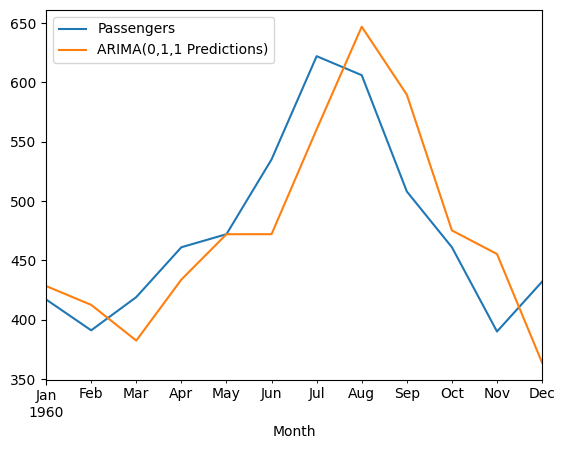

In [36]:
# Plot the Actual Output Data
ax = test['Passengers'].plot(legend = True)

# Plot the Predicted Output
result_predictions.plot(legend = True)

# Remove all the blank space from the graph
ax.autoscale(axis = 'x', tight = True)

In [37]:
# To check whether the model is working or not

from sklearn.metrics import mean_squared_error

ans = mean_squared_error(test['Passengers'], result_predictions)

print(ans)

2323.839707409425


In [38]:
# To find out the sqaure root of the error terms

from statsmodels.tools.eval_measures import rmse

error = rmse(test['Passengers'], result_predictions)

print(error)

48.206220629804875


In [39]:
# RETRAIN THE ARIMA MODEL ON THE ENTIRE DATASET AND PERFORM FUTURE FORECASTING

In [40]:
import statsmodels.api as sm

res = sm.tsa.arima.ARIMA(data['Passengers'], order = (0,1,1))

# train the ARIMA Model
model = res.fit()


# predict the output for the
resultss = model.predict(len(data), len(data)+12*10, typ = 'levels', dynamic = False).rename('ARIMA(0,1,1) Forecast')

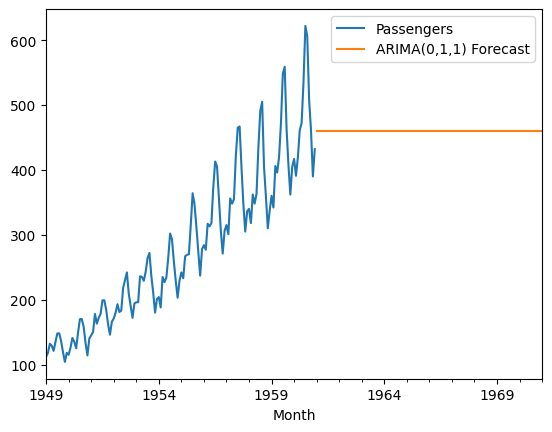

In [41]:
# Plot the actual output
ax = data['Passengers'].plot(legend = True)

# Plot the predicted output
resultss.plot(legend = True)


# Remove all the blank spaces from the grph
ax.autoscale(axis = 'x', tight = True)

# SARIMAX MODEL

In [42]:
# import the library for SARIMAX Model
import statsmodels.api as sm

# create an object for SARIMAX Model and train the model using the training data
model = sm.tsa.SARIMAX(train['Passengers'], order = (0,1,1), seasonal_order = (2,1,0,12), enforce_invertibility = False)

# train the SARIMAX Model using the training data
results = model.fit()

In [43]:
# get the summary for SARIMAX Model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Mon, 03 Jul 2023   AIC                            901.659
Time:                                     13:14:57   BIC                            912.776
Sample:                                 01-01-1949   HQIC                           906.173
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.445      0.149      -0.052       0.343
sigma2       106.2405     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# Predict the value for the SARIMAX Model for the test data
start = len(train)
end   = len(train)+len(test)-1

results_predict = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMAX (0,1,1) Predictions')

In [45]:
# Compare the Actual Output with the Predicted Output
for i in range(len(results_predict)):
    print(f"Predicted Output = {results_predict[i]}, Actual Output = {test['Passengers'][i]}")

Predicted Output = 421.1533732519732, Actual Output = 417
Predicted Output = 401.60574797123195, Actual Output = 391
Predicted Output = 462.0835650057529, Actual Output = 419
Predicted Output = 450.8266944448894, Actual Output = 461
Predicted Output = 475.1243489216323, Actual Output = 472
Predicted Output = 529.7742677274781, Actual Output = 535
Predicted Output = 605.7411414005322, Actual Output = 622
Predicted Output = 618.7741245207214, Actual Output = 606
Predicted Output = 516.7690268415063, Actual Output = 508
Predicted Output = 463.57122276415606, Actual Output = 461
Predicted Output = 417.1689748433536, Actual Output = 390
Predicted Output = 458.049039798677, Actual Output = 432


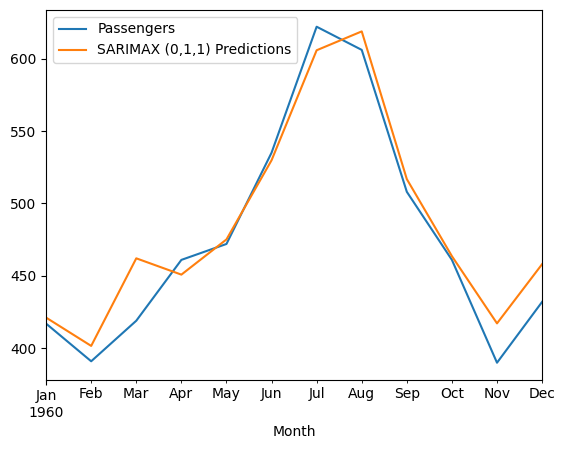

In [46]:
# Plot the Actual Values against the Predicted Values

# Actual Output
ax = test['Passengers'].plot(legend = True)

# Predicted Output
results_predict.plot(legend = True)

# Remove the blankspaces from the graph
ax.autoscale(axis = 'x', tight = True)

# From the above observation, it is clear that the error rate between the actual output and the predicted output is very less in SARIMAX Model than in the ARIMA Model

In [47]:
# To check whether the model is working or not

from sklearn.metrics import mean_squared_error

ans = mean_squared_error(test['Passengers'], results_predict)

print(ans)

337.8527816533712


In [48]:
from statsmodels.tools.eval_measures import rmse

res = rmse(test['Passengers'], results_predict)

print(res)

18.380772063582402


# RETRAIN THE SARIMAX MODEL ON THE ENTIRE DATA AND PERFORM THE FUTURE FORECASTING FOR NEXT TEN YEARS

In [49]:
# create an object for SARIMAX Model and train the SARIMAX Model using the entire dataset
models = sm.tsa.SARIMAX(data['Passengers'], order = (0,1,1), seasonal_order = (2,1,0,12), enforce_invertibility = False)

In [50]:
# train the SARIMAX Model using the entire data

resul = models.fit()


In [51]:
# get the summary for the SARIMAX Model training data
resul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 03 Jul 2023   AIC                           1019.178
Time:                                     13:14:58   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.371      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4454     15.526      8.402      0.000     100.015     160.876
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
# Predict the output for SARIMAX Model for next ten years

start = len(data)
end   = len(data) + 12*10
resul_predict = resul.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMAX (0,1,1) Forecast')

In [53]:
# Get the Predicted Values for the next ten years
print(resul_predict)

1961-01-01    451.347120
1961-02-01    427.102220
1961-03-01    463.382291
1961-04-01    499.705942
1961-05-01    514.035630
                 ...    
1970-09-01    915.106201
1970-10-01    866.504097
1970-11-01    794.445151
1970-12-01    839.648778
1971-01-01    857.274410
Freq: MS, Name: SARIMAX (0,1,1) Forecast, Length: 121, dtype: float64


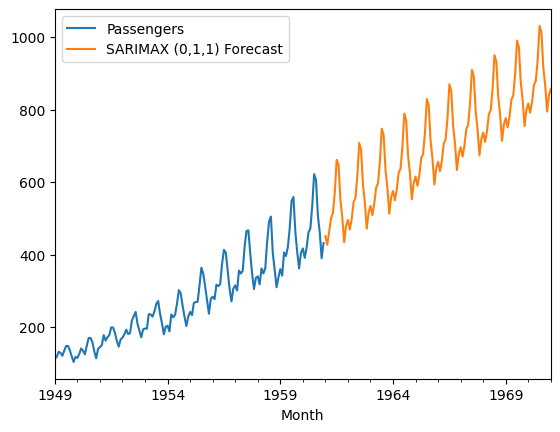

In [54]:
# Plot the Actual against Predicted Output


# Actual Output
data['Passengers'].plot(legend = True)

# Predicted Output
resul_predict.plot(legend = True)

# remove the spaces from the graph
ax.autoscale(axis = 'x', tight = True)

# From the above observation in the graph, we can see that the SARIMAX model has mde the future predictions for the next ten years starting from 1961 till 1971  indicated in the orange color. These future prediction also follow the same trend and seasonality as that of it's current year data.